In [1]:
from hepmc.hamiltonian.spherical_hmc import StaticSphericalHMC
from hepmc.core.densities.gaussian import Gaussian
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
D = 2
mu = np.full(D, .5)
cov = np.array([[.1, .07], [.07, .1]])
target = Gaussian(D, mu, cov=cov)
#camel_1d = Camel(1)
#x = np.linspace(0, 1, 100)
#y = camel_1d.pdf(x)

In [3]:
sample = target.rvs(100000)

In [4]:
sample = sample[np.where((sample > 0).all(axis=1))]
sample = sample[np.where((sample < 1).all(axis=1))]

In [5]:
sample_df = pd.DataFrame(sample)

In [23]:
spherical_hmc = StaticSphericalHMC(target, .8, .8, 10, 10)
start = D*[.5]
spherical_hmc_sample = spherical_hmc.sample(20000, start)

Event 1	(batch acceptance rate: 0.000000)
Event 2	(batch acceptance rate: 0.500000)	max sequence length: 2
Event 3	(batch acceptance rate: 0.333333)	max sequence length: 2
Event 4	(batch acceptance rate: 0.500000)	max sequence length: 2
Event 5	(batch acceptance rate: 0.400000)	max sequence length: 2
Event 6	(batch acceptance rate: 0.333333)	max sequence length: 3
Event 7	(batch acceptance rate: 0.428571)	max sequence length: 3
Event 8	(batch acceptance rate: 0.500000)	max sequence length: 3
Event 9	(batch acceptance rate: 0.555556)	max sequence length: 3
Event 10	(batch acceptance rate: 0.500000)	max sequence length: 3
Event 20	(batch acceptance rate: 0.600000)	max sequence length: 3
Event 30	(batch acceptance rate: 0.500000)	max sequence length: 6
Event 40	(batch acceptance rate: 0.500000)	max sequence length: 7
Event 50	(batch acceptance rate: 0.520000)	max sequence length: 7
Event 60	(batch acceptance rate: 0.533333)	max sequence length: 7
Event 70	(batch acceptance rate: 0.514286)

In [24]:
spherical_hmc_df = pd.DataFrame(spherical_hmc_sample.data)

In [25]:
print('min:', spherical_hmc_sample.weights.min())
print('max:', spherical_hmc_sample.weights.max())
print('mean:', spherical_hmc_sample.weights.mean())
print('std:', spherical_hmc_sample.weights.std())

min: 0.931151443667135
max: 7.066429644918205
mean: 1.1218910083772153
std: 0.3759140851903709


<Figure size 432x288 with 0 Axes>

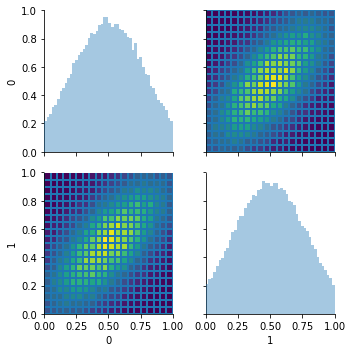

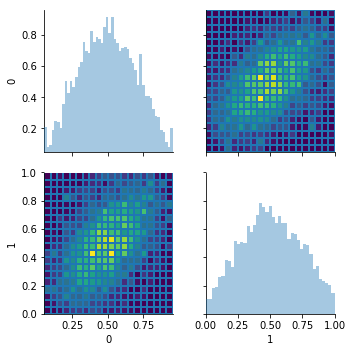

In [26]:
plt.figure(0)
g = sns.PairGrid(sample_df)
g = g.map_diag(sns.distplot, norm_hist=True, kde=False)
g = g.map_offdiag(plt.hist2d, bins=20)
plt.figure(1)
h = sns.PairGrid(spherical_hmc_df)
h = h.map_diag(sns.distplot, norm_hist=True, kde=False, hist_kws={"weights" : spherical_hmc_sample.weights})
h = h.map_offdiag(plt.hist2d, weights=spherical_hmc_sample.weights, bins=20)
#h = h.map_diag(sns.distplot, norm_hist=True, kde=False)
#h = h.map_offdiag(plt.hist2d, bins=20)

In [ ]:
fig, ax = plt.subplots(1, 2, sharey='row', figsize=(10,5))
#ax1 = fig.add_subplot(1, 2, 1)
ax[0].plot(x, y, 'r-')
sns.distplot(spherical_hmc_df[0], ax=ax[0], kde=False, norm_hist=True, hist_kws={"weights" : spherical_hmc_sample.weights})
#ax2 = fig.add_subplot(1, 2, 2)
ax[1].plot(x, y, 'r-')
sns.distplot(spherical_hmc_df[1], ax=ax[1], kde=False, norm_hist=True, hist_kws={"weights" : spherical_hmc_sample.weights})

In [ ]:
util.effective_sample_size(spherical_hmc_sample, spherical_hmc_sample.mean, spherical_hmc_sample.variance)

In [ ]:
# resample
resamp_idx = np.random.choice(1000, 1000, p=spherical_hmc_sample.weights/spherical_hmc_sample.weights.sum())
spherical_hmc_resample = MarkovSample(data=spherical_hmc_sample.data[resamp_idx])
spherical_hmc_resample_df = pd.DataFrame(spherical_hmc_resample.data)

In [ ]:
fig, ax = plt.subplots(1, 2, sharey='row', figsize=(10,5))
#ax1 = fig.add_subplot(1, 2, 1)
ax[0].plot(x, y, 'r-')
sns.distplot(spherical_hmc_resample_df[0], ax=ax[0], kde=False, norm_hist=True)
#ax2 = fig.add_subplot(1, 2, 2)
ax[1].plot(x, y, 'r-')
sns.distplot(spherical_hmc_resample_df[1], ax=ax[1], kde=False, norm_hist=True)

In [ ]:
plt.figure()
grid = sns.jointplot(x=0, y=1, data=spherical_hmc_resample_df, kind="hex", marginal_kws={"norm_hist" : True})
grid.ax_marg_x.axes.plot(x, y, 'r-')
grid.ax_marg_y.axes.plot(y, x, 'r-')